## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  71.383110   828.317841  0.996179  8.859218   828.031584
1  80.364048  1698.189532  0.974875  7.177390  1657.308730
2  74.958364   376.818527  0.908629  6.385017   350.462555
3  80.025680   914.507261  0.624566  3.569689   576.756983
4  43.282572  1698.184633  0.763191  4.844817  1296.679889


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9798629	total: 58ms	remaining: 57.9s
1:	learn: 0.9675685	total: 58.6ms	remaining: 29.2s
2:	learn: 0.9576497	total: 59.2ms	remaining: 19.7s
3:	learn: 0.9465297	total: 59.7ms	remaining: 14.9s
4:	learn: 0.9321419	total: 60.2ms	remaining: 12s
5:	learn: 0.9198651	total: 60.6ms	remaining: 10s
6:	learn: 0.9067066	total: 61.2ms	remaining: 8.68s
7:	learn: 0.8955799	total: 61.7ms	remaining: 7.65s
8:	learn: 0.8838851	total: 62.1ms	remaining: 6.84s
9:	learn: 0.8719417	total: 62.6ms	remaining: 6.2s
10:	learn: 0.8595195	total: 63.1ms	remaining: 5.67s
11:	learn: 0.8484473	total: 63.7ms	remaining: 5.24s
12:	learn: 0.8383776	total: 64.1ms	remaining: 4.87s
13:	learn: 0.8257802	total: 64.6ms	remaining: 4.55s
14:	learn: 0.8141326	total: 65.1ms	remaining: 4.27s
15:	learn: 0.8032668	total: 65.5ms	remaining: 4.03s
16:	learn: 0.7938614	total: 65.8ms	remaining: 3.81s
17:	learn: 0.7846396	total: 66.2ms	remaining: 3.61s
18:	learn: 0.7770892	total: 66.6ms	remaining: 3.44s

100:	learn: 0.2993326	total: 106ms	remaining: 940ms
101:	learn: 0.2968342	total: 106ms	remaining: 935ms
102:	learn: 0.2933386	total: 107ms	remaining: 929ms
103:	learn: 0.2901962	total: 107ms	remaining: 922ms
104:	learn: 0.2862420	total: 107ms	remaining: 916ms
105:	learn: 0.2839541	total: 108ms	remaining: 909ms
106:	learn: 0.2803257	total: 108ms	remaining: 903ms
107:	learn: 0.2770219	total: 109ms	remaining: 897ms
108:	learn: 0.2741454	total: 109ms	remaining: 891ms
109:	learn: 0.2708128	total: 109ms	remaining: 885ms
110:	learn: 0.2672898	total: 110ms	remaining: 879ms
111:	learn: 0.2643220	total: 110ms	remaining: 874ms
112:	learn: 0.2614834	total: 111ms	remaining: 868ms
113:	learn: 0.2588130	total: 111ms	remaining: 863ms
114:	learn: 0.2559337	total: 112ms	remaining: 858ms
115:	learn: 0.2530283	total: 112ms	remaining: 854ms
116:	learn: 0.2499531	total: 112ms	remaining: 847ms
117:	learn: 0.2476586	total: 113ms	remaining: 841ms
118:	learn: 0.2452371	total: 113ms	remaining: 836ms
119:	learn: 

290:	learn: 0.0498991	total: 186ms	remaining: 452ms
291:	learn: 0.0495372	total: 186ms	remaining: 451ms
292:	learn: 0.0491769	total: 186ms	remaining: 450ms
293:	learn: 0.0488321	total: 187ms	remaining: 449ms
294:	learn: 0.0484943	total: 187ms	remaining: 447ms
295:	learn: 0.0481066	total: 188ms	remaining: 446ms
296:	learn: 0.0477121	total: 188ms	remaining: 445ms
297:	learn: 0.0473635	total: 188ms	remaining: 444ms
298:	learn: 0.0471006	total: 189ms	remaining: 443ms
299:	learn: 0.0467552	total: 189ms	remaining: 441ms
300:	learn: 0.0463539	total: 190ms	remaining: 440ms
301:	learn: 0.0460505	total: 190ms	remaining: 439ms
302:	learn: 0.0457462	total: 190ms	remaining: 438ms
303:	learn: 0.0454454	total: 191ms	remaining: 437ms
304:	learn: 0.0451290	total: 191ms	remaining: 436ms
305:	learn: 0.0448280	total: 192ms	remaining: 435ms
306:	learn: 0.0445101	total: 192ms	remaining: 434ms
307:	learn: 0.0441702	total: 192ms	remaining: 432ms
308:	learn: 0.0438784	total: 193ms	remaining: 431ms
309:	learn: 

533:	learn: 0.0169068	total: 287ms	remaining: 251ms
534:	learn: 0.0168286	total: 288ms	remaining: 250ms
535:	learn: 0.0167523	total: 288ms	remaining: 249ms
536:	learn: 0.0166777	total: 288ms	remaining: 249ms
537:	learn: 0.0166048	total: 289ms	remaining: 248ms
538:	learn: 0.0165336	total: 289ms	remaining: 247ms
539:	learn: 0.0164400	total: 290ms	remaining: 247ms
540:	learn: 0.0163714	total: 290ms	remaining: 246ms
541:	learn: 0.0163044	total: 290ms	remaining: 245ms
542:	learn: 0.0162257	total: 291ms	remaining: 245ms
543:	learn: 0.0161664	total: 291ms	remaining: 244ms
544:	learn: 0.0161018	total: 291ms	remaining: 243ms
545:	learn: 0.0160358	total: 292ms	remaining: 243ms
546:	learn: 0.0159582	total: 292ms	remaining: 242ms
547:	learn: 0.0158958	total: 293ms	remaining: 241ms
548:	learn: 0.0158417	total: 293ms	remaining: 241ms
549:	learn: 0.0157862	total: 294ms	remaining: 240ms
550:	learn: 0.0157344	total: 294ms	remaining: 239ms
551:	learn: 0.0156910	total: 294ms	remaining: 239ms
552:	learn: 

720:	learn: 0.0085527	total: 367ms	remaining: 142ms
721:	learn: 0.0085208	total: 368ms	remaining: 142ms
722:	learn: 0.0084919	total: 368ms	remaining: 141ms
723:	learn: 0.0084703	total: 368ms	remaining: 140ms
724:	learn: 0.0084407	total: 369ms	remaining: 140ms
725:	learn: 0.0084113	total: 369ms	remaining: 139ms
726:	learn: 0.0083878	total: 369ms	remaining: 139ms
727:	learn: 0.0083709	total: 370ms	remaining: 138ms
728:	learn: 0.0083468	total: 370ms	remaining: 138ms
729:	learn: 0.0083173	total: 371ms	remaining: 137ms
730:	learn: 0.0083007	total: 371ms	remaining: 136ms
731:	learn: 0.0082843	total: 371ms	remaining: 136ms
732:	learn: 0.0082495	total: 372ms	remaining: 135ms
733:	learn: 0.0082335	total: 372ms	remaining: 135ms
734:	learn: 0.0081995	total: 373ms	remaining: 134ms
735:	learn: 0.0081839	total: 373ms	remaining: 134ms
736:	learn: 0.0081609	total: 373ms	remaining: 133ms
737:	learn: 0.0081279	total: 374ms	remaining: 133ms
738:	learn: 0.0081108	total: 374ms	remaining: 132ms
739:	learn: 

955:	learn: 0.0046922	total: 469ms	remaining: 21.6ms
956:	learn: 0.0046760	total: 470ms	remaining: 21.1ms
957:	learn: 0.0046697	total: 470ms	remaining: 20.6ms
958:	learn: 0.0046611	total: 471ms	remaining: 20.1ms
959:	learn: 0.0046522	total: 471ms	remaining: 19.6ms
960:	learn: 0.0046440	total: 472ms	remaining: 19.1ms
961:	learn: 0.0046287	total: 472ms	remaining: 18.6ms
962:	learn: 0.0046226	total: 473ms	remaining: 18.2ms
963:	learn: 0.0046122	total: 473ms	remaining: 17.7ms
964:	learn: 0.0046062	total: 474ms	remaining: 17.2ms
965:	learn: 0.0046009	total: 474ms	remaining: 16.7ms
966:	learn: 0.0045930	total: 475ms	remaining: 16.2ms
967:	learn: 0.0045851	total: 475ms	remaining: 15.7ms
968:	learn: 0.0045746	total: 476ms	remaining: 15.2ms
969:	learn: 0.0045605	total: 476ms	remaining: 14.7ms
970:	learn: 0.0045546	total: 476ms	remaining: 14.2ms
971:	learn: 0.0045406	total: 477ms	remaining: 13.7ms
972:	learn: 0.0045315	total: 477ms	remaining: 13.2ms
973:	learn: 0.0045113	total: 478ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

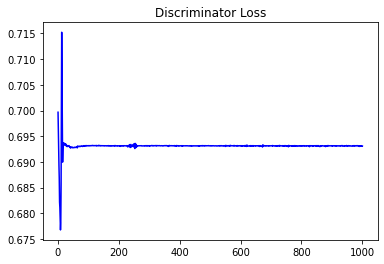

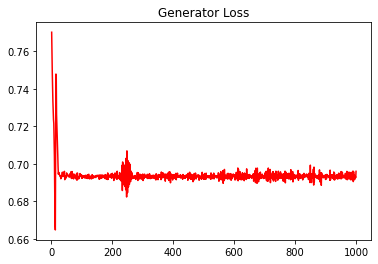

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.006748237737683281


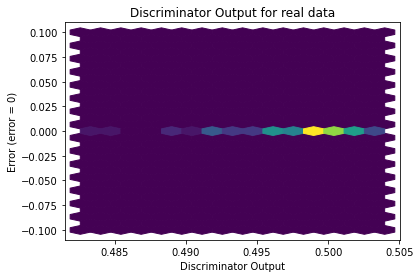

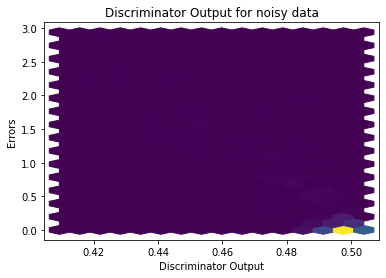

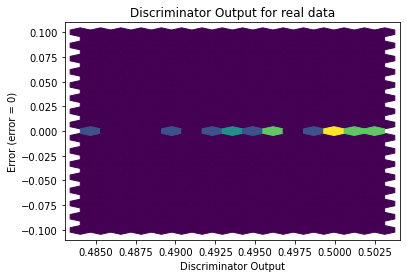

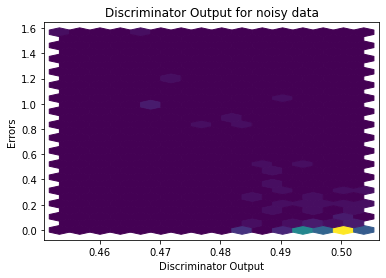

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


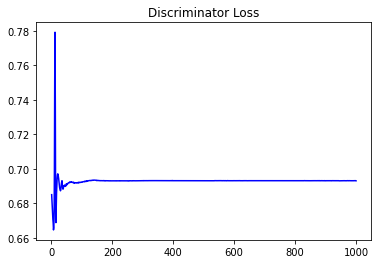

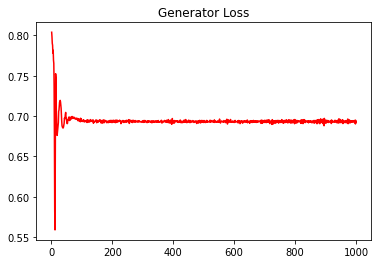

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0029647358346836477


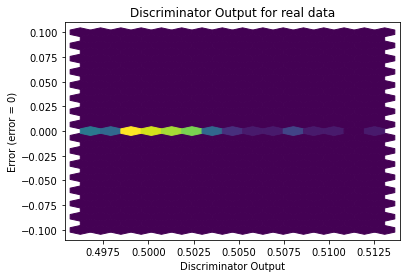

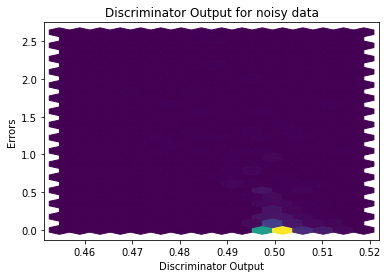

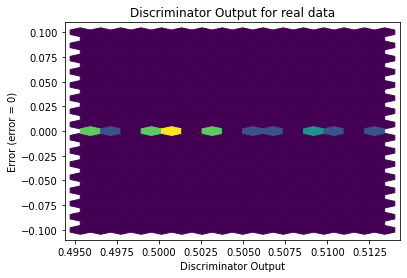

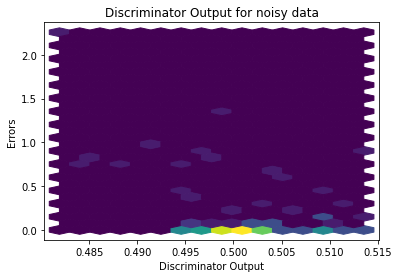

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1970]], requires_grad=True)
